In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

In [ ]:
data=load_iris()

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
y=data.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x=data.data

In [ ]:
y=to_categorical(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
seq=Sequential()

In [ ]:
seq.add(Dense(10,activation='relu',input_dim=4,kernel_regularizer=l2(0.01)))#regulaizer
seq.add(Dropout(0.2))#dropout
seq.add(Dense(10,activation='relu',kernel_regularizer=l2(0.01)))
seq.add(Dropout(0.2))
seq.add(Dense(3,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
seq.compile(optimizer='adam',loss= "categorical_crossentropy",metrics=['accuracy'])

In [ ]:
callbacks=EarlyStopping(monitor='val_loss',mode='auto',patience=0,restore_best_weights='true',min_delta=0)#Earlystoping

In [ ]:
history=seq.fit(x_train,y_train,epochs=240,validation_split=0.2,callbacks=callbacks)

Epoch 1/240
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.2031 - loss: 1.4757 - val_accuracy: 0.1667 - val_loss: 1.6084
Epoch 2/240
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1302 - loss: 1.5461 - val_accuracy: 0.1667 - val_loss: 1.5719
Epoch 3/240
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1719 - loss: 1.4161 - val_accuracy: 0.1667 - val_loss: 1.5390
Epoch 4/240
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2344 - loss: 1.4042 - val_accuracy: 0.2083 - val_loss: 1.5069
Epoch 5/240
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2878 - loss: 1.4364 - val_accuracy: 0.2083 - val_loss: 1.4759
Epoch 6/240
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3021 - loss: 1.3723 - val_accuracy: 0.2083 - val_loss: 1.4469
Epoch 7/240
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1471 - loss: 1.4247 - val_accuracy: 0.2917 - val_loss: 1.4184
Epoch 8/240
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2669 - loss: 1.3644 - val_accuracy: 0.2917 - val_loss

In [ ]:
y_pred=seq.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


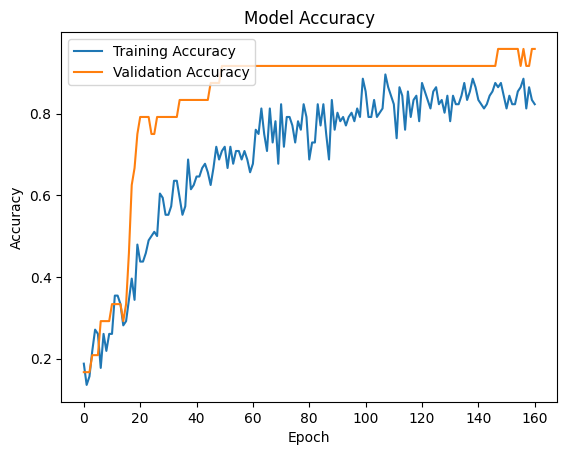

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


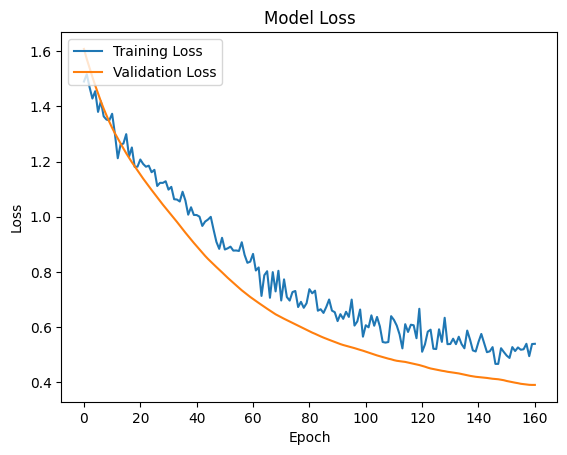

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')